In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [5]:
scheduler=pd.read_csv('./fullsample-corrected.csv')

In [6]:
scheduler=scheduler[(scheduler['BEGIN'] != 'Unknown') & (scheduler['END']!='Unknown')]

## Convert to DateTime Format

In [7]:
scheduler['BEGIN']=pd.to_datetime(scheduler['BEGIN'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
scheduler['END']=pd.to_datetime(scheduler['END'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
scheduler.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,TIMEOUT,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:15
2,30858137,TIMEOUT,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:15
3,30935078,TIMEOUT,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:15
4,31364111_2,TIMEOUT,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:9
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0


## Jobs Per Hour Completed

In [ ]:
#I get a memory error
#completed_jobs.groupby(pd.Grouper(key='END', freq ='W'))['JOBID'].count()/168

In [10]:
scheduler['IN_ARRAY']=scheduler['JOBID'].str.contains('_')

In [11]:
scheduler['ARRAY_ID']=scheduler['JOBID'].str.contains(r'(.+)_')

C:\Users\U6033919\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [12]:
completed_jobs=scheduler[(scheduler['STATE']=='COMPLETED')]

In [13]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,IN_ARRAY,ARRAY_ID
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0,True,True
6,31364111_4,COMPLETED,2021-08-17 07:45:07,2021-09-06 06:25:11,16384Mn,9785.61M,24-09:00:00,19-22:40:04,1,1,production,0:0,True,True
7,31364111_5,COMPLETED,2021-08-17 07:45:07,2021-09-06 10:05:33,16384Mn,9966.38M,24-09:00:00,20-02:20:26,1,1,production,0:0,True,True
8,31364111_6,COMPLETED,2021-08-17 07:45:07,2021-09-05 12:53:04,16384Mn,9684.02M,24-09:00:00,19-05:07:57,1,1,production,0:0,True,True
9,31364111_9,COMPLETED,2021-08-17 07:45:07,2021-09-06 09:10:13,16384Mn,9802.24M,24-09:00:00,20-01:25:06,1,1,production,0:0,True,True


In [14]:

completed_jobs['ROLLING1H']=completed_jobs.sort_values('END',ascending=False).rolling('H', on='END')['JOBID'].count()

<ipython-input-14-1a2e9acbc44e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_jobs['ROLLING1H']=completed_jobs.sort_values('END',ascending=False).rolling('H', on='END')['JOBID'].count()


In [15]:
completed_jobs=completed_jobs.sort_values('END', ascending=False)

In [18]:
#completed_jobs.groupby('IN_ARRAY')['JOBID']

In [25]:
completed_jobs['JOBID'].str.split('_').str[0]

1491978    32923997
1491977    32923996
927388     32923989
927387     32923988
927386     32923987
             ...   
6640643    24460658
6640651    24460668
6640627    24460639
6640635    24460647
6640577    24460577
Name: JOBID, Length: 5871385, dtype: object

In [16]:
completed_jobs['JOBID_ARRAY']=completed_jobs['JOBID'].str.split('_').str[0]

In [37]:
completed_jobs.loc[completed_jobs['IN_ARRAY']==True]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,IN_ARRAY,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH,ROLLING_H_ARRAY,Date,Hour
806639,32305950_170,COMPLETED,2021-09-27 10:13:55,2021-10-06 07:58:30,15360Mn,103.29M,14-00:00:00,8-21:44:35,1,1,production,0:0,True,True,9.0,32305950,8 days 21:44:35,1.0,2021-10-06,7
923229,32906933_49,COMPLETED,2021-10-02 17:11:56,2021-10-06 02:04:11,2048Mc,574.58M,5-00:00:00,3-08:52:15,1,1,production,0:0,True,True,9.0,32906933,3 days 08:52:15,1.0,2021-10-06,2
923260,32906933_80,COMPLETED,2021-10-02 17:11:56,2021-10-06 01:54:22,2048Mc,574.86M,5-00:00:00,3-08:42:26,1,1,production,0:0,True,True,10.0,32906933,3 days 08:42:26,2.0,2021-10-06,1
923230,32906933_50,COMPLETED,2021-10-02 17:11:56,2021-10-06 01:42:20,2048Mc,574.62M,5-00:00:00,3-08:30:24,1,1,production,0:0,True,True,11.0,32906933,3 days 08:30:24,3.0,2021-10-06,1
923257,32906933_77,COMPLETED,2021-10-02 17:11:56,2021-10-06 01:40:22,2048Mc,574.85M,5-00:00:00,3-08:28:26,1,1,production,0:0,True,True,12.0,32906933,3 days 08:28:26,4.0,2021-10-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646859,24468151_4,COMPLETED,2020-10-01 05:01:59,2020-10-01 06:52:47,4096Mn,2314.95M,10:00:00,01:50:48,1,1,production,0:0,True,True,166.0,24468151,0 days 01:50:48,98.0,2020-10-01,6
6647009,24468305_4,COMPLETED,2020-10-01 05:10:03,2020-10-01 06:49:42,4096Mn,1851.90M,10:00:00,01:39:39,1,1,production,0:0,True,True,149.0,24468305,0 days 01:39:39,90.0,2020-10-01,6
6647008,24468305_3,COMPLETED,2020-10-01 05:10:03,2020-10-01 06:49:33,4096Mn,1884.17M,10:00:00,01:39:30,1,1,production,0:0,True,True,147.0,24468305,0 days 01:39:30,89.0,2020-10-01,6
6647005,24468304_6,COMPLETED,2020-10-01 05:10:03,2020-10-01 06:45:08,4096Mn,1891.84M,10:00:00,01:35:05,1,1,production,0:0,True,True,107.0,24468304,0 days 01:35:05,76.0,2020-10-01,6


In [18]:
completed_jobs['JOBLENGTH']= completed_jobs['END']-completed_jobs['BEGIN']

In [19]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,IN_ARRAY,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000Mn,0.09M,2-00:00:00,00:01:45,1,1,sam,0:0,False,False,1.0,32923997,0 days 00:01:45
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,sam,0:0,False,False,2.0,32923996,0 days 00:01:37
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,sam,0:0,False,False,3.0,32923989,0 days 00:01:35
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,sam,0:0,False,False,4.0,32923988,0 days 00:02:19
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,sam,0:0,False,False,5.0,32923987,0 days 00:01:55


In [21]:
#rolling('H', on='END')['JOBID'].count()
completed_jobs['ROLLING_H_ARRAY']=completed_jobs.rolling('H', on='END')['IN_ARRAY'].sum()

In [22]:
completed_jobs.sort_values('ROLLING_H_ARRAY', ascending=False).head(50)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,IN_ARRAY,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH,ROLLING_H_ARRAY
1982198,31136786_864,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:24,2048Mn,141.98M,00:15:00,00:02:52,1,1,production,0:0,True,True,13590.0,31136786,0 days 00:02:52,13554.0
1982328,31136786_994,COMPLETED,2021-08-12 10:18:03,2021-08-12 10:20:24,2048Mn,142.51M,00:15:00,00:02:21,1,1,production,0:0,True,True,13589.0,31136786,0 days 00:02:21,13553.0
1982059,31136786_725,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:24,2048Mn,141.60M,00:15:00,00:02:52,1,1,production,0:0,True,True,13588.0,31136786,0 days 00:02:52,13552.0
1517556,30504814_1061,COMPLETED,2021-08-12 10:07:32,2021-08-12 10:20:07,8192Mc,12840.53M,02:00:00,00:12:35,1,4,production,0:0,True,True,13587.0,30504814,0 days 00:12:35,13551.0
1982167,31136786_833,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:00,2048Mn,140.08M,00:15:00,00:02:28,1,1,production,0:0,True,True,13587.0,31136786,0 days 00:02:28,13551.0
1982132,31136786_798,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:24,2048Mn,141.52M,00:15:00,00:02:52,1,1,production,0:0,True,True,13587.0,31136786,0 days 00:02:52,13551.0
1982317,31136786_983,COMPLETED,2021-08-12 10:18:03,2021-08-12 10:20:25,2048Mn,141.87M,00:15:00,00:02:22,1,1,production,0:0,True,True,13587.0,31136786,0 days 00:02:22,13551.0
1982085,31136786_751,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:01,2048Mn,140.02M,00:15:00,00:02:29,1,1,production,0:0,True,True,13586.0,31136786,0 days 00:02:29,13550.0
1982140,31136786_806,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:24,2048Mn,141.45M,00:15:00,00:02:52,1,1,production,0:0,True,True,13586.0,31136786,0 days 00:02:52,13550.0
1982146,31136786_812,COMPLETED,2021-08-12 10:17:32,2021-08-12 10:20:07,2048Mn,140.44M,00:15:00,00:02:35,1,1,production,0:0,True,True,13586.0,31136786,0 days 00:02:35,13550.0


In [23]:
completed_jobs['Date']=completed_jobs['END'].dt.date
completed_jobs['Hour']=completed_jobs['END'].dt.hour


In [24]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,IN_ARRAY,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH,ROLLING_H_ARRAY,Date,Hour
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000Mn,0.09M,2-00:00:00,00:01:45,1,1,sam,0:0,False,False,1.0,32923997,0 days 00:01:45,0.0,2021-10-07,20
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,sam,0:0,False,False,2.0,32923996,0 days 00:01:37,0.0,2021-10-07,20
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,sam,0:0,False,False,3.0,32923989,0 days 00:01:35,0.0,2021-10-07,20
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,sam,0:0,False,False,4.0,32923988,0 days 00:02:19,0.0,2021-10-07,20
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,sam,0:0,False,False,5.0,32923987,0 days 00:01:55,0.0,2021-10-07,20


In [36]:
#from pandas.plotting import autocorrelation_plot

In [1]:
#plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})

#autocorrelation_plot(completed_jobs.rolling('H', on='END'))['JOBID'].count()
#plt.xlim(0,50)

In [35]:
#number of jobs ended per hour
ended_per_hour=completed_jobs.groupby(pd.Grouper(key='END', freq ='H'))['JOBID'].count()

Text(0.5, 1.0, 'Completed Jobs Per Hour')

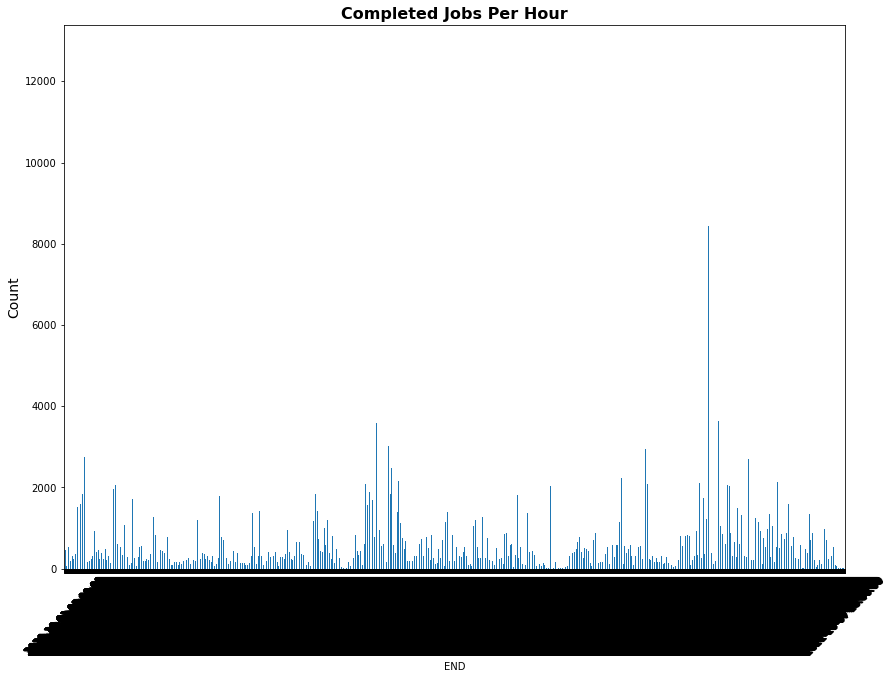

In [34]:
plt.figure(figsize = (14, 10))
ended_per_hour_by_week.plot(kind='bar')
plt.xticks(rotation = 45)
plt.yticks(fontsize = 10)
plt.ylabel('Count', fontsize = 14)
plt.title('Completed Jobs Per Hour', fontsize = 16, fontweight = 'bold')

In [32]:
ended_per_hour

END
2020-10-04     133.470238
2020-10-11     938.583333
2020-10-18     511.107143
2020-10-25    1305.297619
2020-11-01     406.178571
2020-11-08     258.904762
2020-11-15     578.017857
2020-11-22     462.559524
2020-11-29     236.666667
2020-12-06     891.398810
2020-12-13     367.630952
2020-12-20     363.267857
2020-12-27     281.595238
2021-01-03     437.494048
2021-01-10     388.601190
2021-01-17     395.154762
2021-01-24     401.220238
2021-01-31     884.107143
2021-02-07     747.559524
2021-02-14     302.005952
2021-02-21     603.202381
2021-02-28     934.452381
2021-03-07     744.351190
2021-03-14     873.166667
2021-03-21     559.261905
2021-03-28     617.238095
2021-04-04     493.029762
2021-04-11     559.244048
2021-04-18     568.821429
2021-04-25     423.559524
2021-05-02     731.821429
2021-05-09     779.065476
2021-05-16     551.363095
2021-05-23      89.035714
2021-05-30      86.434524
2021-06-06     524.547619
2021-06-13     471.297619
2021-06-20     633.059524
2021-06-

In [36]:
#ended_per_hour_by_week.rolling('24h', on='period')['END'].sum()

In [62]:
#completed by week
completed_by_week=completed_jobs.groupby(pd.Grouper(key='END', freq ='W'))['JOBID'].count()

In [83]:
type(completed_by_week)

pandas.core.series.Series

In [84]:
completed_by_week.shape[0]

54

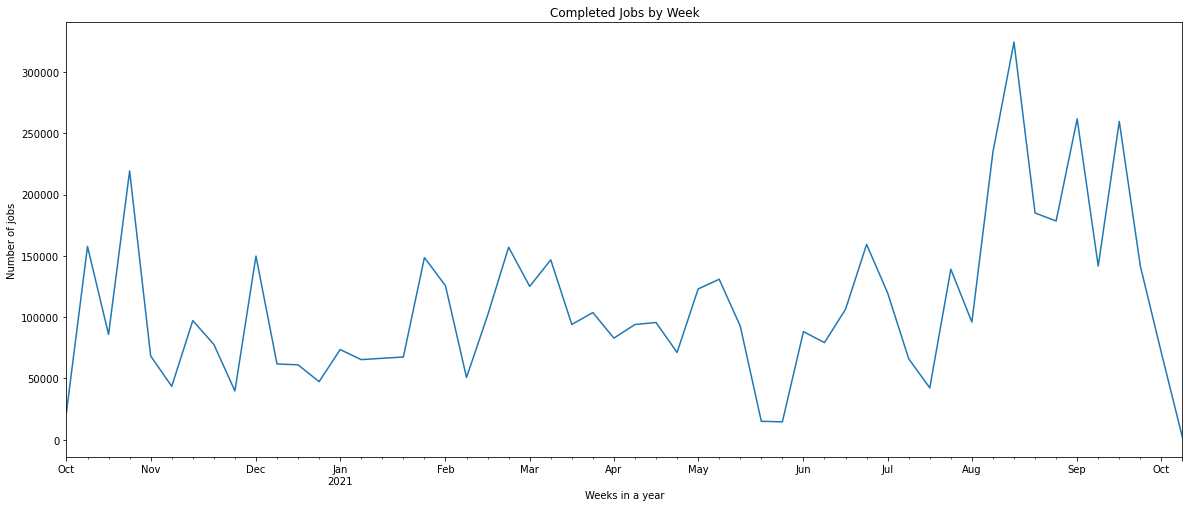

In [65]:
plt.figure(figsize = (20,8))
completed_by_week.plot()
plt.title('Completed Jobs by Week')
plt.xlabel('Weeks in a year')
plt.ylabel('Number of jobs');

In [424]:
type(completed_by_week)

pandas.core.series.Series

In [425]:
completed_by_week_adj = completed_by_week.iloc[1:completed_by_week.shape[0]-2]

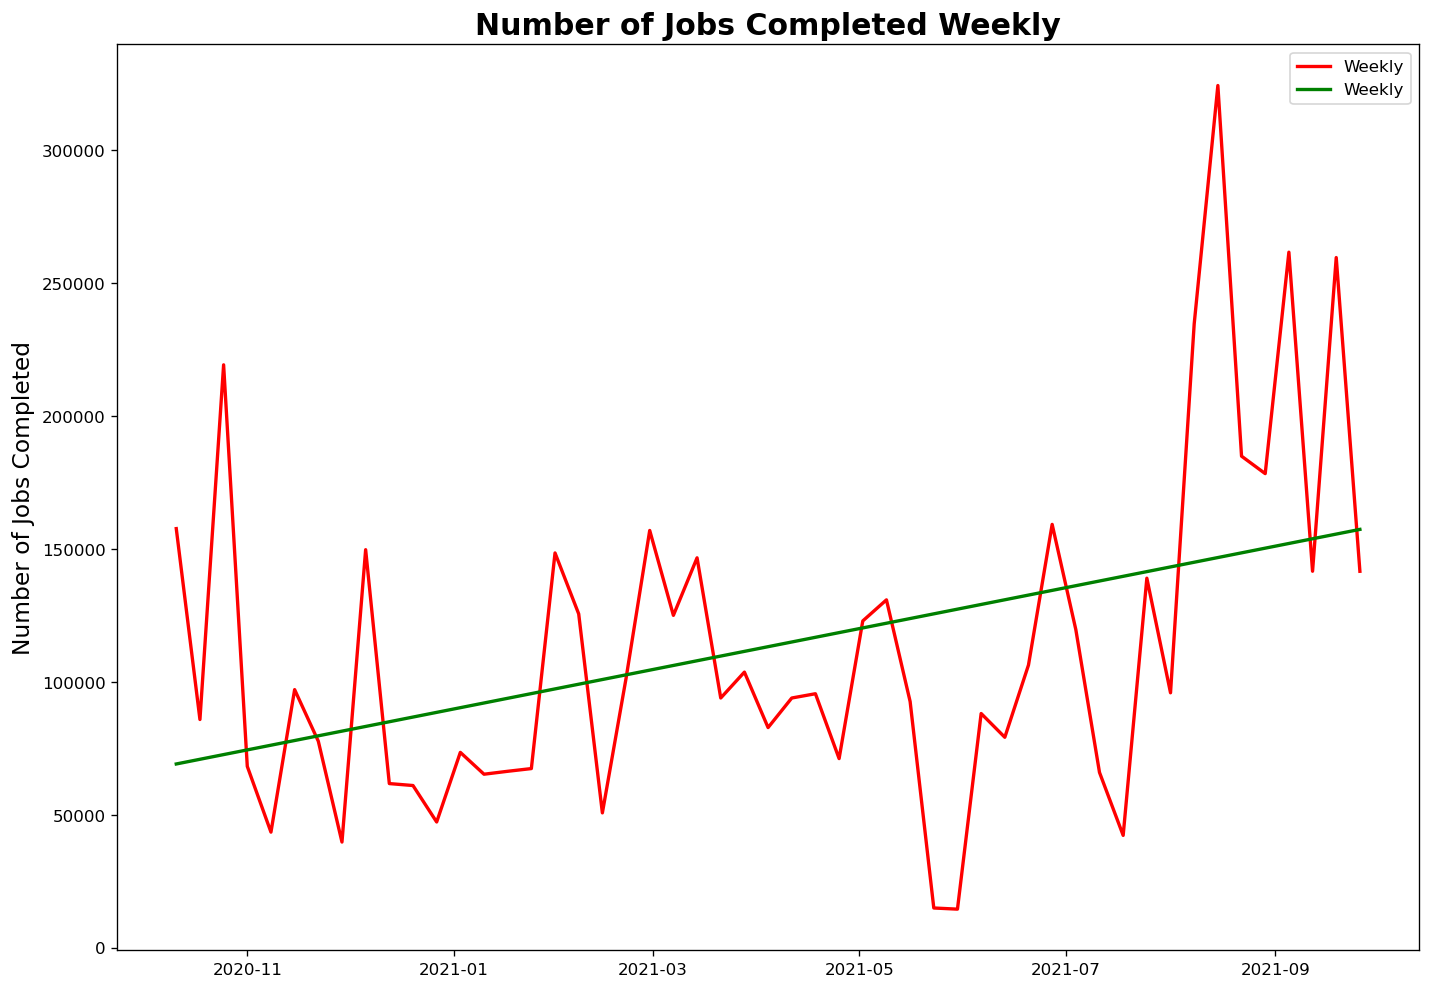

In [437]:

coefs, resid, _, _, _ = np.polyfit(range(completed_by_week_adj.shape[0]),completed_by_week_adj.values,1,full=True)
line_series = pd.Series(data=[coefs[0]*x + coefs[1] for x in range(completed_by_week_adj.shape[0])], 
                       index=completed_by_week_adj.index)
start_idx = 0
end_idx = completed_by_week_adj.shape[0]
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(completed_by_week_adj, linewidth=2, color='red', label='Weekly')
ax.plot(line_series, linewidth=2, color='green', label='Weekly')

ax.legend()
#ax.set_xlabel('Weeks in the Year', fontsize=14)
ax.set_ylabel('Number of Jobs Completed', fontsize=14)
ax.set_title('Number of Jobs Completed Weekly', fontsize=18, fontweight="bold")
coefs
plt.savefig('images/completed_jobs_weekly.png', dpi=150)
plt.show()
plt.close()

In [226]:
coefs

array([5.70408558e-02, 3.02576701e+02])

In [268]:
completed_jobs_weekend_weekday=completed_jobs.groupby(['Date','Hour','IN_ARRAY' ])['JOBID'].count().reset_index()

In [269]:
completed_jobs_weekend_weekday

,Date,Hour,IN_ARRAY,JOBID
0,2020-10-01,0,False,13
1,2020-10-01,1,False,13
2,2020-10-01,2,False,16
3,2020-10-01,3,False,14
4,2020-10-01,4,False,113
...,...,...,...,...
17461,2021-10-07,16,False,8
17462,2021-10-07,17,False,8
17463,2021-10-07,18,False,8
17464,2021-10-07,19,False,8


In [271]:
completed_jobs_weekend_weekday['Date']=pd.to_datetime(completed_jobs_weekend_weekday['Date'],format='%Y-%m-%dT%H:%M:%S')

In [272]:
completed_jobs_weekend_weekday

,Date,Hour,IN_ARRAY,JOBID
0,2020-10-01,0,False,13
1,2020-10-01,1,False,13
2,2020-10-01,2,False,16
3,2020-10-01,3,False,14
4,2020-10-01,4,False,113
...,...,...,...,...
17461,2021-10-07,16,False,8
17462,2021-10-07,17,False,8
17463,2021-10-07,18,False,8
17464,2021-10-07,19,False,8


In [278]:
df_array_single=completed_jobs_weekend_weekday.groupby([pd.Grouper(key='Date', freq='W'), 'IN_ARRAY'])['JOBID'].sum()

In [280]:
df_array_single=df_array_single.reset_index()


In [339]:
df_array_single.head()

,Date,IN_ARRAY,JOBID
0,2020-10-04,False,7042
1,2020-10-04,True,15381
2,2020-10-11,False,37399
3,2020-10-11,True,120283
4,2020-10-18,False,21718


In [355]:
# Sum jobid per date for a Array vs Single Jobs Trends plot
total_array_single_jobs=df_array_single.groupby('Date')['JOBID'].sum()

In [362]:
#df.plot(kind='scatter', x='Date', y='JOBID', s='IN_ARRAY')
#total_array_single_jobs.plot(kind='scatter', x='Date', y='JOBID')
#total_array_single_jobs.plot()


In [363]:
completed_by_week

END
2020-10-04     22423
2020-10-11    157682
2020-10-18     85866
2020-10-25    219290
2020-11-01     68238
Freq: W-SUN, Name: JOBID, dtype: int64

In [366]:
weekly_time_series=completed_by_week.to_frame().reset_index()

In [373]:
weekly_time_series['END']=pd.to_datetime(weekly_time_series['END'], format='%Y-%m-%dT%H:%M:%S')
weekly_time_series['END']=weekly_time_series['END'].dt.week

<ipython-input-373-2aab7df5cb64>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_time_series['END']=weekly_time_series['END'].dt.week


In [422]:
weekly_time_series.reset_index(level=None)
weekly_time_series

,END,JOBID
0,40,22423
1,41,157682
2,42,85866
3,43,219290
4,44,68238
5,45,43496
6,46,97107
7,47,77710
8,48,39760
9,49,149755


In [430]:
weekly_time_series=weekly_time_series.iloc[1:completed_by_week.shape[0]-2]

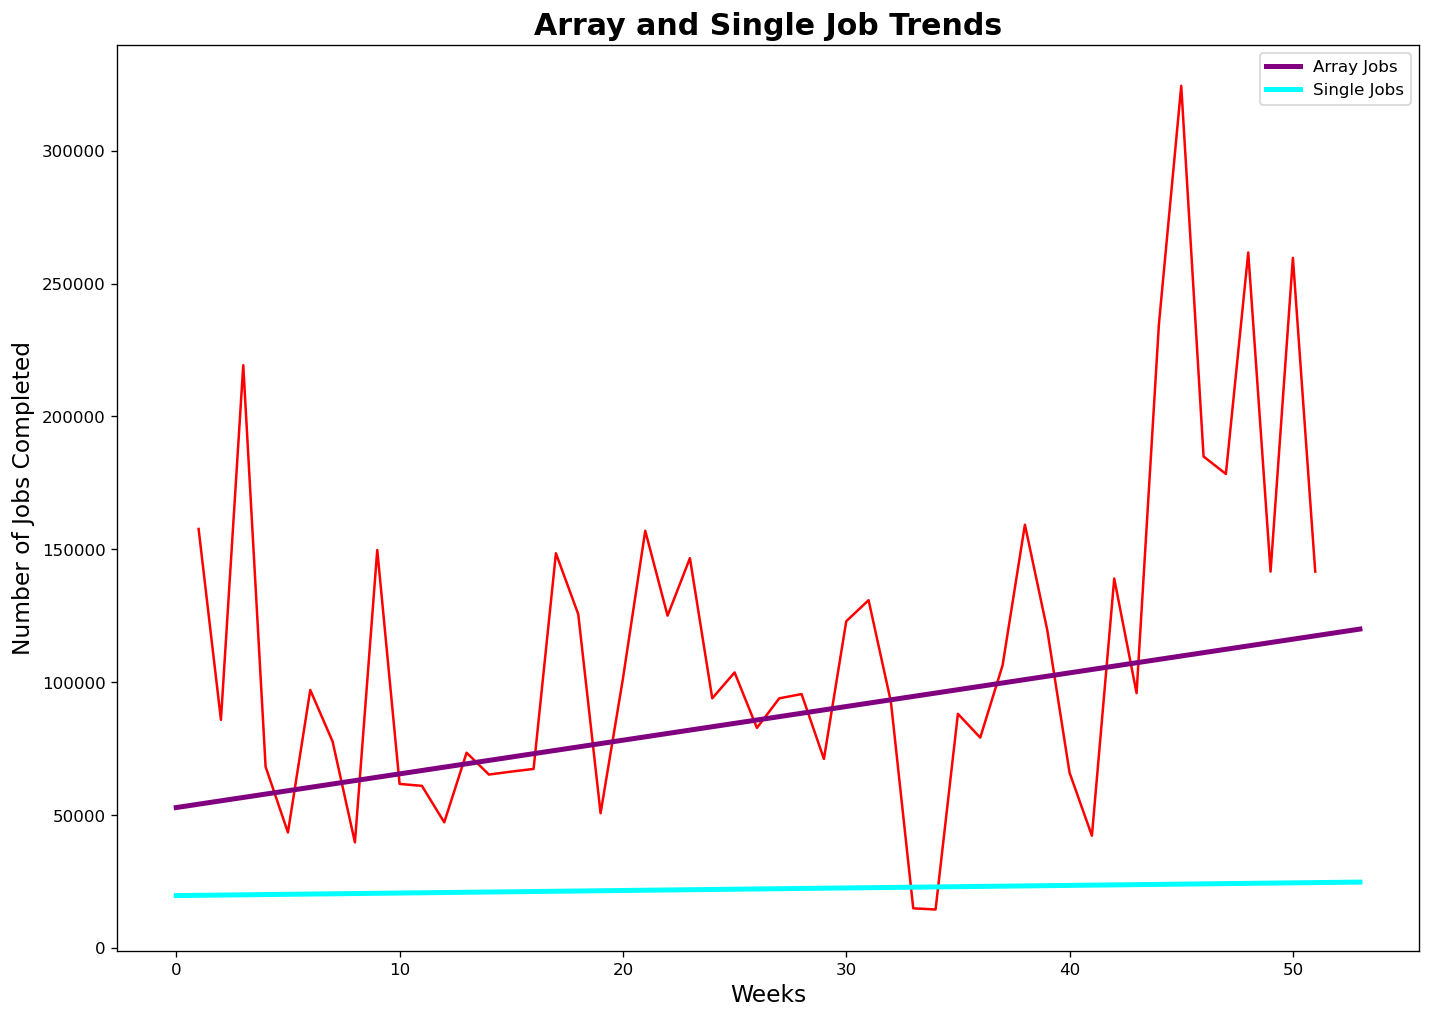

In [440]:
array_jobs=df_array_single.loc[df_array_single['IN_ARRAY']==True]
single_jobs =df_array_single[df_array_single['IN_ARRAY']==False]
import numpy as np
def calc_trend(df):
    coefs, resid, _, _, _ = np.polyfit(range(df.shape[0]), df['JOBID'], 1, full=True)

    start_idx = 0
    end_idx = df.shape[0]
    return coefs

coefs = calc_trend(array_jobs)
coefs_single = calc_trend(single_jobs)


fig, ax = plt.subplots(figsize=(14,10))
end_idx = array_jobs.shape[0]

ax.plot(weekly_time_series['JOBID'], color='red')
ax.plot([coefs[0]*x + coefs[1] for x in range(end_idx)], linewidth=3, color='purple', label='Array Jobs')
ax.plot([coefs_single[0]*x + coefs_single[1] for x in range(end_idx)], linewidth=3, color='cyan', label='Single Jobs')


ax.legend()
ax.set_xlabel('Weeks', fontsize=14)
ax.set_ylabel('Number of Jobs Completed', fontsize=14)
ax.set_title('Array and Single Job Trends', fontsize=18, fontweight="bold")
plt.savefig('array_vs_single_jobs.png', dpi=150)
plt.show()
plt.close()

In [225]:
coefs
#coefs_single

array([5.70408558e-02, 3.02576701e+02])

In [289]:
#completed_jobs_break_down[completed_jobs_break_down['IN_ARRAY']==False]

In [91]:
completed_jobs['DAYOFWEEK']=completed_jobs['END'].dt.dayofweek

In [93]:
completed_jobs['WEEKEND']=completed_jobs['DAYOFWEEK'].isin([5,6])

In [171]:
completed_jobs['WEEK_NUM']=completed_jobs['END'].dt.week

<ipython-input-171-222da1525f6e>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  completed_jobs['WEEK_NUM']=completed_jobs['END'].dt.week


In [172]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH,ROLLING_H_ARRAY,Date,Hour,DAYOFWEEK,WEEKEND,WEEK_NUM
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000Mn,0.09M,2-00:00:00,00:01:45,1,1,...,False,1.0,32923997,0 days 00:01:45,0.0,2021-10-07,20,3,False,40
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,...,False,2.0,32923996,0 days 00:01:37,0.0,2021-10-07,20,3,False,40
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,...,False,3.0,32923989,0 days 00:01:35,0.0,2021-10-07,20,3,False,40
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,...,False,4.0,32923988,0 days 00:02:19,0.0,2021-10-07,20,3,False,40
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,...,False,5.0,32923987,0 days 00:01:55,0.0,2021-10-07,20,3,False,40


In [169]:
#completed_jobs.groupby(['Date','WEEKEND'])['JOBID'].count().plot()

In [112]:
df10=completed_jobs.groupby(['Date','WEEKEND'])['JOBID'].count().reset_index()


In [117]:
df10.head()

,Date,WEEKEND,JOBID
0,2020-10-01,False,3945
1,2020-10-02,False,3853
2,2020-10-03,True,6897
3,2020-10-04,True,7728
4,2020-10-05,False,13107


In [170]:
#pd.pivot(df10, index="Date", columns="WEEKEND", values="JOBID").plot()

In [156]:
df10['WEEK_NUM']=df10['Date'].dt.week

<ipython-input-156-c972707371af>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df10['WEEK_NUM']=df10['Date'].dt.week


In [166]:
weekly_df10=df10.groupby(['WEEK_NUM', 'WEEKEND'])['JOBID'].sum().reset_index()


In [167]:
weekly_df10.head()

,WEEK_NUM,WEEKEND,JOBID
0,1,False,48343
1,1,True,16942
2,2,False,50208
3,2,True,16178
4,3,False,50558


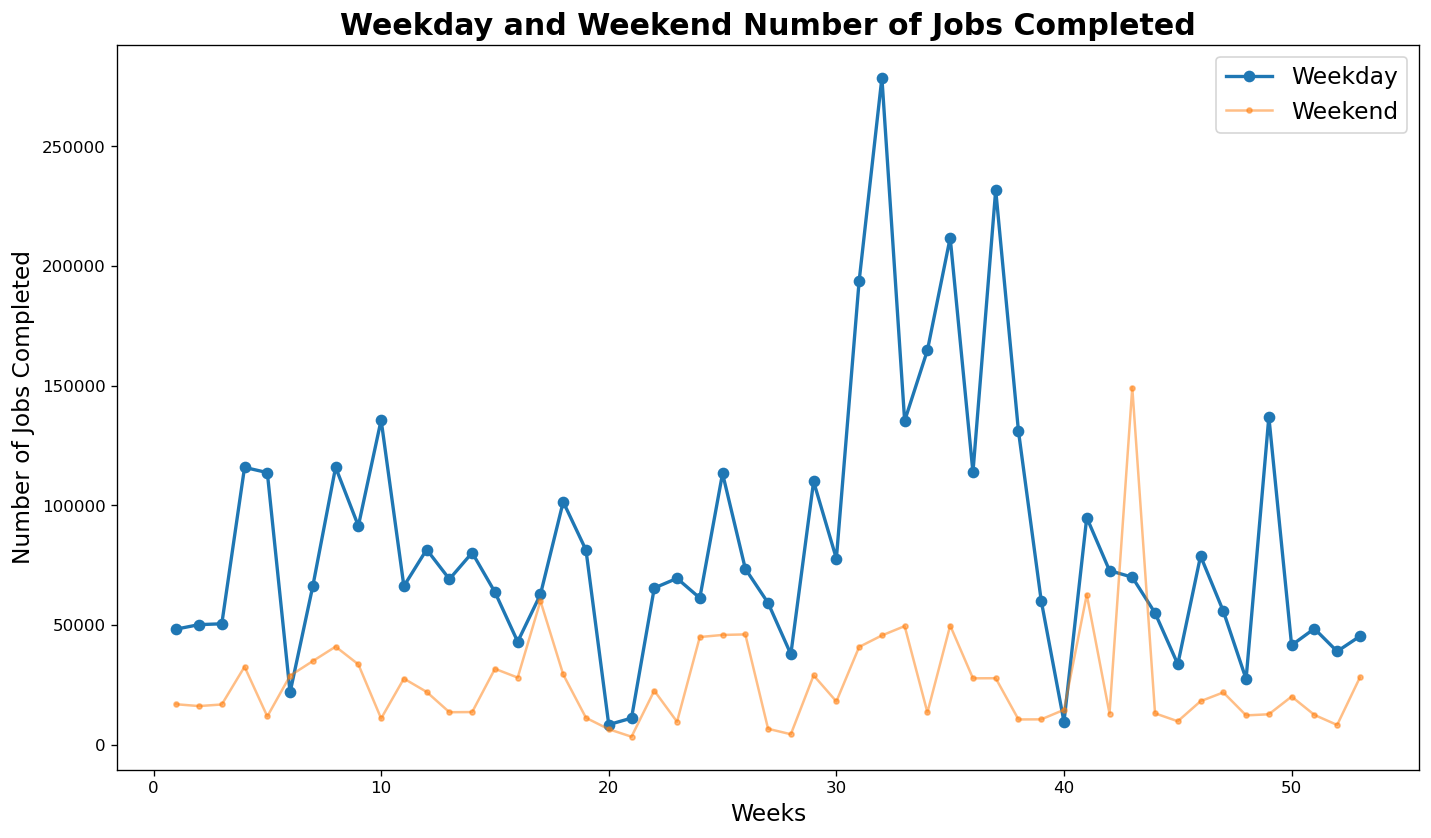

In [439]:
df_weekend=pd.pivot(weekly_df10, index="WEEK_NUM", columns="WEEKEND", values="JOBID").reset_index()
df_weekend.columns=['WEEK_NUM', 'Weekday', 'Weekend']
plt.figure(figsize=(14,8))
plt.plot(df_weekend['WEEK_NUM'], df_weekend['Weekday'], label='Weekday', marker='o', linestyle='-',linewidth=2.0)
plt.plot(df_weekend['WEEK_NUM'], df_weekend['Weekend'], label='Weekend', marker='.', alpha=0.5)
plt.title('Weekday and Weekend Number of Jobs Completed', fontsize=18, fontweight="bold")
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=14)
plt.ylabel('Number of Jobs Completed', fontsize=14)
plt.savefig('./images/weekday_weekend_jobs.png', dpi=150)
plt.show()
plt.close()



In [287]:
#pd.pivot(weekly_df10, index="WEEK_NUM", columns="WEEKEND", values="JOBID").plot(figsize = (20,8))
completed_by_week.head()

END
2020-10-04     22423
2020-10-11    157682
2020-10-18     85866
2020-10-25    219290
2020-11-01     68238
Freq: W-SUN, Name: JOBID, dtype: int64

In [186]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

In [222]:
completed_jobs.rolling('7d', on='END')['JOBID'].count()

1491978        1.0
1491977        2.0
927388         3.0
927387         4.0
927386         5.0
            ...   
6640643    61078.0
6640651    61073.0
6640627    61049.0
6640635    61050.0
6640577    61026.0
Name: JOBID, Length: 5871385, dtype: float64

In [294]:
from pandas.plotting import autocorrelation_plot

(0.0, 50.0)

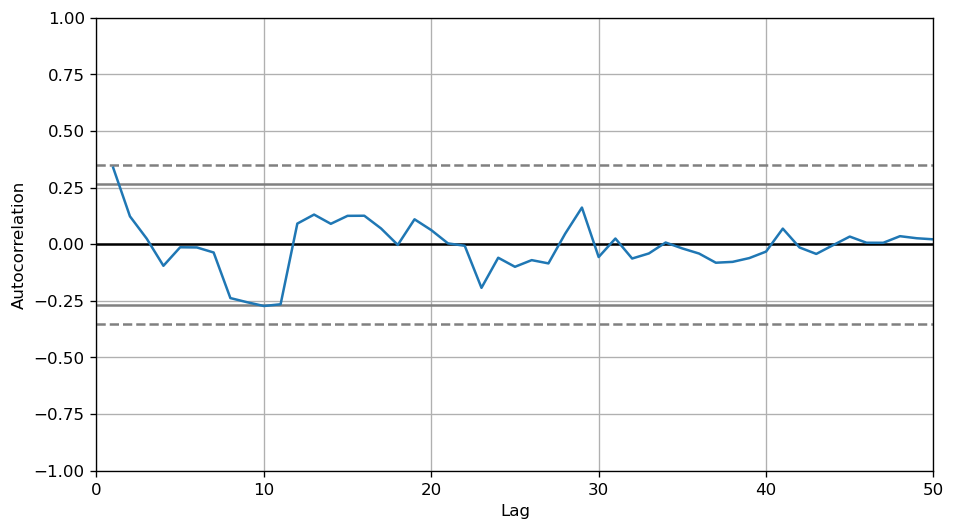

In [298]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})

autocorrelation_plot(single_jobs['JOBID'])
plt.xlim(0,50)

In [403]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH,ROLLING_H_ARRAY,Date,Hour,DAYOFWEEK,WEEKEND,WEEK_NUM
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000Mn,0.09M,2-00:00:00,00:01:45,1,1,...,False,1.0,32923997,0 days 00:01:45,0.0,2021-10-07,20,3,False,40
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,...,False,2.0,32923996,0 days 00:01:37,0.0,2021-10-07,20,3,False,40
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,...,False,3.0,32923989,0 days 00:01:35,0.0,2021-10-07,20,3,False,40
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,...,False,4.0,32923988,0 days 00:02:19,0.0,2021-10-07,20,3,False,40
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,...,False,5.0,32923987,0 days 00:01:55,0.0,2021-10-07,20,3,False,40


In [406]:
completed_jobs['JOBLENGTH']=completed_jobs['END']-completed_jobs['BEGIN']

In [407]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,ARRAY_ID,ROLLING1H,JOBID_ARRAY,JOBLENGTH,ROLLING_H_ARRAY,Date,Hour,DAYOFWEEK,WEEKEND,WEEK_NUM
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000Mn,0.09M,2-00:00:00,00:01:45,1,1,...,False,1.0,32923997,0 days 00:01:45,0.0,2021-10-07,20,3,False,40
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,...,False,2.0,32923996,0 days 00:01:37,0.0,2021-10-07,20,3,False,40
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,...,False,3.0,32923989,0 days 00:01:35,0.0,2021-10-07,20,3,False,40
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,...,False,4.0,32923988,0 days 00:02:19,0.0,2021-10-07,20,3,False,40
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,...,False,5.0,32923987,0 days 00:01:55,0.0,2021-10-07,20,3,False,40


In [ ]:
completed_jobs.groupby('JOBID','WEEK_NUM','IN_ARRAY','JOBLENGTH')